In [1]:
#Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import re
import scipy.stats as stats
import seaborn as sbn

In [2]:
# Import downloaded CSV as "starter data"
wines_csv = "winemag-data-130k-v2.csv"
wine_df = pd.read_csv(wines_csv)
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# Lets take a look at what we are starting with
print([wine_df.count()])

[Unnamed: 0               129971
country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64]


In [4]:
# Drop unneeded columns, drop any records NaN and see what we are left with
wine_df2 = wine_df.drop(['Unnamed: 0' ,'description','designation','region_1', 'region_2', 
                         'taster_name', 'taster_twitter_handle'], axis=1).dropna()
print(wine_df2.count())
wine_df2.head()

country     120915
points      120915
price       120915
province    120915
title       120915
variety     120915
winery      120915
dtype: int64


,country,points,price,province,title,variety,winery
1,Portugal,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [5]:
#Make copy of refined data to start working with (CWD = Clean Working Data)
CWD = wine_df2.copy()
#calculate new wine metric using price/adjusted rating point are from 80-100pts and add to CWD
CWD['new_wine_metric'] = CWD['price']/(CWD['points']-79)
CWD

,country,points,price,province,title,variety,winery,new_wine_metric
1,Portugal,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1.875000
2,US,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,1.750000
3,US,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,1.625000
4,US,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,8.125000
5,Spain,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,1.875000
...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2.545455
129967,US,90,75.0,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,6.818182
129968,France,90,30.0,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2.727273
129969,France,90,32.0,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2.909091


In [6]:
#Basic Data
print('Basic analysis of price and point data:')
cal_count = CWD.loc[CWD['province'] == 'California']['new_wine_metric'].count()
noncal_count = CWD.loc[CWD['province'] != 'California']['new_wine_metric'].count()
print(f'Of the {len(CWD)} records, {cal_count} were reviews of Californian wines while {noncal_count} were not.')
cal_price = CWD.loc[CWD['province'] == 'California']['price']
noncal_price = CWD.loc[CWD['province'] != 'California']['price']
print(f'Californian wine has a price range of ${cal_price.min()} to ${cal_price.max()} with an avg. of ${cal_price.mean()}')
print(f'Non Californian wine has a price range of ${noncal_price.min()} to ${noncal_price.max()} with an avg. of ${noncal_price.mean()}')
cal_pts = CWD.loc[CWD['province'] == 'California']['points']
noncal_pts = CWD.loc[CWD['province'] != 'California']['points']
print(f'California wine is typically rated at about {cal_pts.mean()}pts, while Non Californian wine is rated at {noncal_pts.mean()}pts')
cal_nwm = CWD.loc[CWD['province'] == 'California']['new_wine_metric']
noncal_nwm = CWD.loc[CWD['province'] != 'California']['new_wine_metric']
print(f'California NWM = {cal_nwm.mean()}, NonCalifornia NWM = {noncal_nwm.mean()}')

Basic analysis of price and point data:
Of the 120915 records, 36104 were reviews of Californian wines while 84811 were not.
Californian wine has a price range of $4.0 to $2013.0 with an avg. of $39.04104808331487
Non Californian wine has a price range of $4.0 to $3300.0 with an avg. of $33.80552051031116
California wine is typically rated at about 88.6295147352094pts, while Non Californian wine is rated at 88.33327044840881pts
California NWM = 4.207393880952622, NonCalifornia NWM = 3.492135739366323


The total number of unique countries is 42
[country
US              54265
France          17776
Italy           16914
Spain            6573
Portugal         4875
Chile            4415
Argentina        3756
Austria          2799
Australia        2294
Germany          2120
New Zealand      1378
South Africa     1293
Israel            489
Greece            461
Canada            254
Hungary           145
Bulgaria          141
Romania           120
Uruguay           109
Turkey             90
Name: points, dtype: int64]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEBE1DC448>],
      dtype=object)

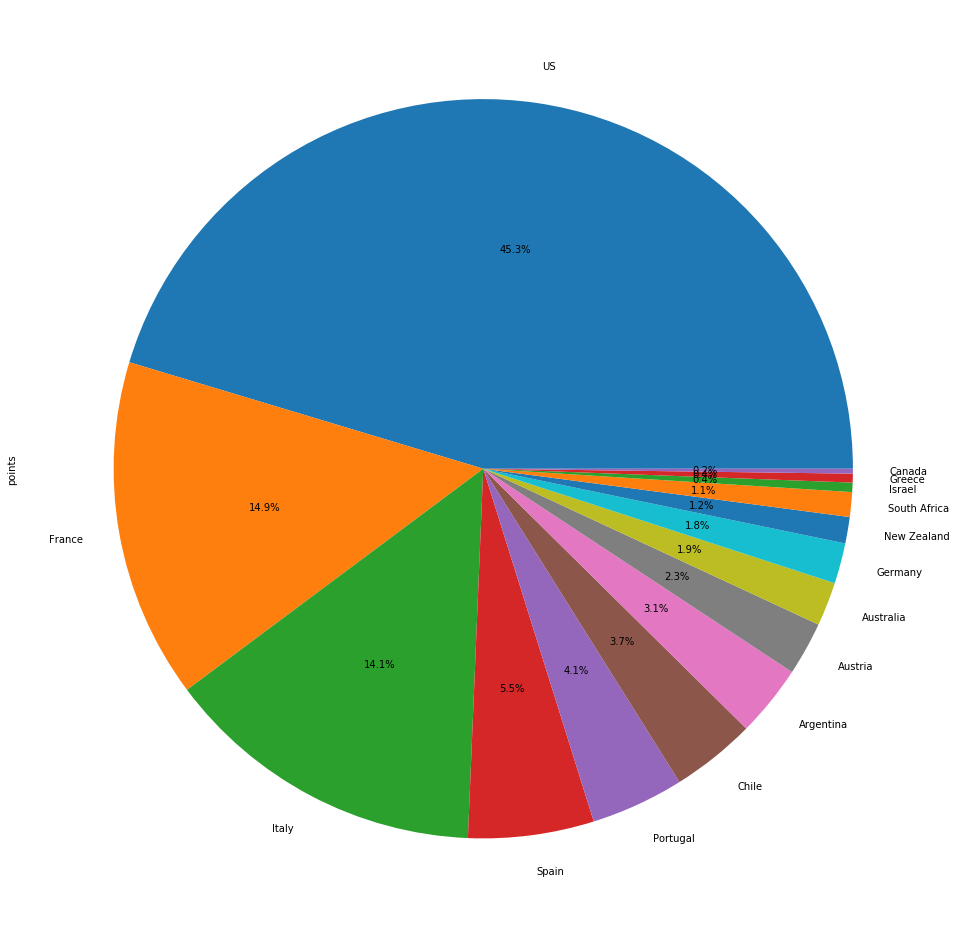

In [7]:
# See percentage of reviews by country for top 15
cwd_cntry = CWD.groupby('country')
cwd_cntry_count = cwd_cntry['points'].count()

print(f'The total number of unique countries is {len(cwd_cntry_count.index)}')
print([cwd_cntry_count.sort_values(ascending=False).head(20)])

# Create pie plot of top 15 countries reviewed
t15_cwd_cntry_count = cwd_cntry_count.sort_values(ascending=False).head(15)
t15_cwd_cntry_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

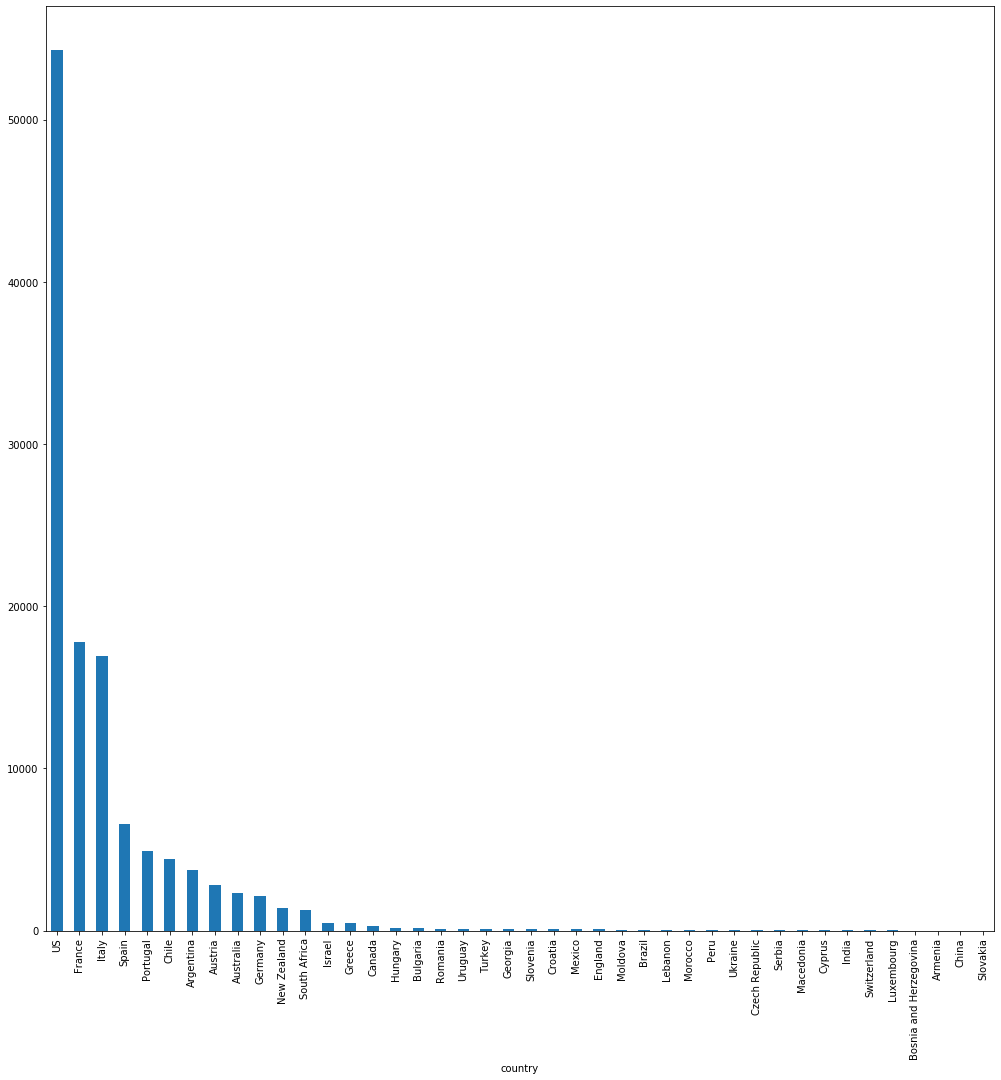

In [8]:
cwd_cntry_count.sort_values(ascending=False, inplace=True)
cwd_cntry_count.plot.bar(figsize=(17,17))

The total number of unique state/provinces is 422
[province
California            36104
Washington             8583
Oregon                 5359
Tuscany                5128
Bordeaux               4002
Northern Spain         3797
Mendoza Province       3226
Burgundy               3106
Piedmont               3089
New York               2676
Veneto                 2315
Alsace                 2147
Northeastern Italy     1986
Loire Valley           1598
Sicily & Sardinia      1559
Champagne              1383
Southwest France       1335
South Australia        1331
Catalonia              1153
Provence               1139
Name: points, dtype: int64]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC05252C8>],
      dtype=object)

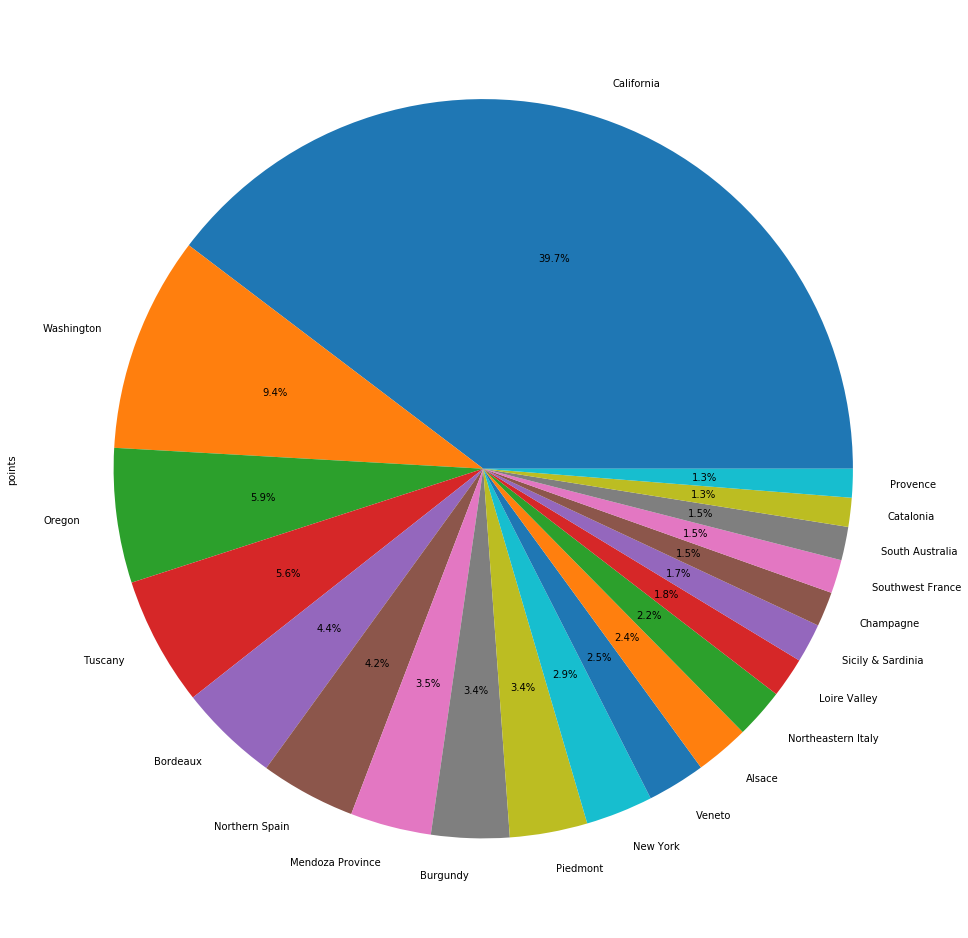

In [9]:
# See percentage of review by province/state for top 20
cwd_prov = CWD.groupby('province')
cwd_prov_count = cwd_prov['points'].count()

print(f'The total number of unique state/provinces is {len(cwd_prov_count.index)}')
print([cwd_prov_count.sort_values(ascending=False).head(20)])

# Create pie plot of top 20 types by count of all wines
t20_cwd_prov_count = cwd_prov_count.sort_values(ascending=False).head(20)
t20_cwd_prov_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

In [10]:
# Create df for CA wines
clean_ca_wines = CWD.loc[CWD['province'] == "California"]
clean_ca_wines.head()

,country,points,price,province,title,variety,winery,new_wine_metric
10,US,87,19.0,California,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2.375
12,US,87,34.0,California,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,4.250
14,US,87,12.0,California,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,1.500
23,US,87,22.0,California,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,2.750
25,US,87,69.0,California,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,8.625


In [11]:
# create df for all wines
clean_gbl_wines = CWD.copy()
clean_gbl_wines.head()

,country,points,price,province,title,variety,winery,new_wine_metric
1,Portugal,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1.875
2,US,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,1.750
3,US,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,1.625
4,US,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,8.125
5,Spain,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,1.875


In [12]:
# create df for all wines excluding CA wines
clean_gbl_wines_noca = clean_gbl_wines.loc[clean_gbl_wines['province'] != "California"]
clean_gbl_wines_noca.head()

,country,points,price,province,title,variety,winery,new_wine_metric
1,Portugal,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1.875
2,US,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,1.750
3,US,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,1.625
4,US,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,8.125
5,Spain,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,1.875


[variety
Pinot Noir                  6875
Cabernet Sauvignon          5668
Chardonnay                  5157
Zinfandel                   2633
Syrah                       1862
Sauvignon Blanc             1801
Red Blend                   1791
Merlot                      1390
Bordeaux-style Red Blend     876
Petite Sirah                 692
Sparkling Blend              547
Rosé                         509
Rhône-style Red Blend        496
Viognier                     434
Grenache                     373
White Blend                  360
Cabernet Franc               358
Pinot Grigio                 291
Riesling                     259
Sangiovese                   254
Name: title, dtype: int64]

There are 193 varietal types of wine reviewed from Califonrina

This is a breakdown of the top 20 by count of reviews


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC0E72648>],
      dtype=object)

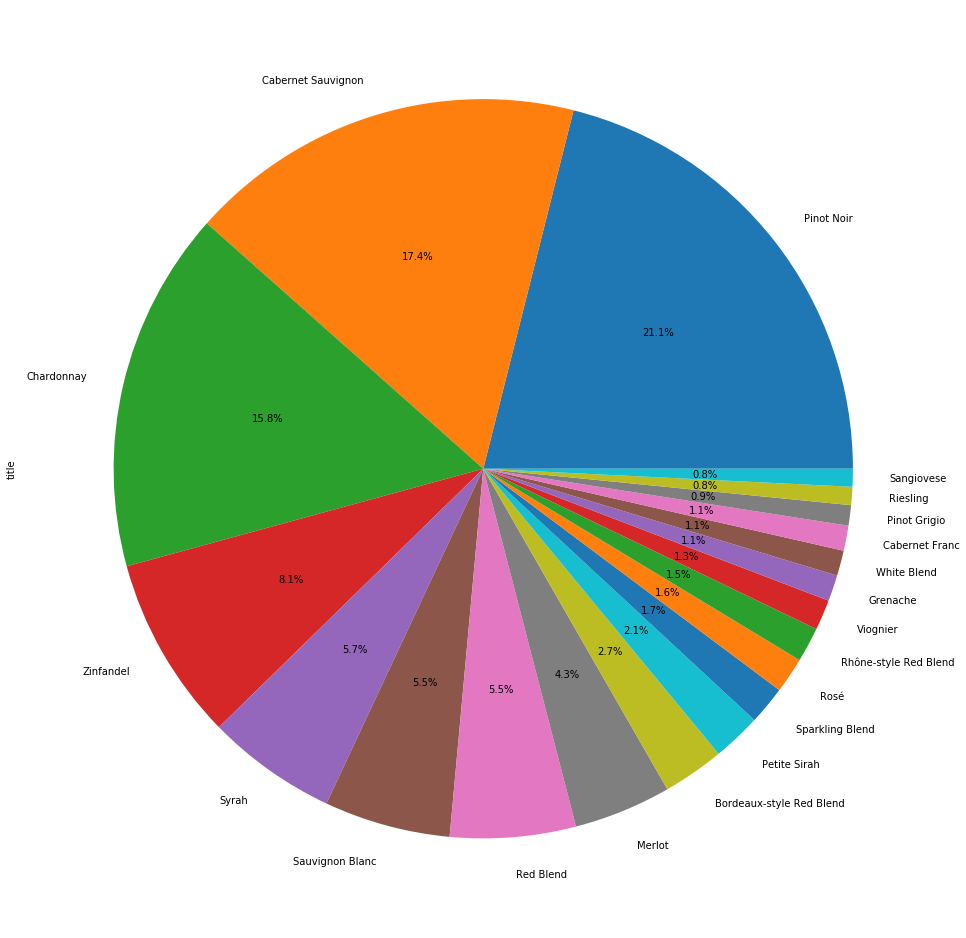

In [13]:
#ordered list of types and counts of CA wines
ca_varietal = clean_ca_wines.groupby('variety')
ca_type_count = ca_varietal['title'].count()
print([ca_type_count.sort_values(ascending=False).head(20)])
print()
print(f'There are {len(ca_type_count.index)} varietal types of wine reviewed from Califonrina')
print()
# Create pie plot of top 20 types by count of CA wines
print('This is a breakdown of the top 20 by count of reviews')
t20_ca_type_count = ca_type_count.sort_values(ascending=False).head(20)
t20_ca_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

[variety
Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Riesling                     4971
Sauvignon Blanc              4780
Syrah                        4086
Rosé                         3261
Merlot                       3061
Zinfandel                    2708
Malbec                       2593
Sangiovese                   2377
Nebbiolo                     2331
Portuguese Red               2196
White Blend                  2167
Sparkling Blend              2027
Tempranillo                  1788
Rhône-style Red Blend        1404
Pinot Gris                   1388
Name: title, dtype: int64]

There are 691 varietal types of wine reviewed from All over the world

This is a breakdown of the top 20 by count of reviews


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC0F29748>],
      dtype=object)

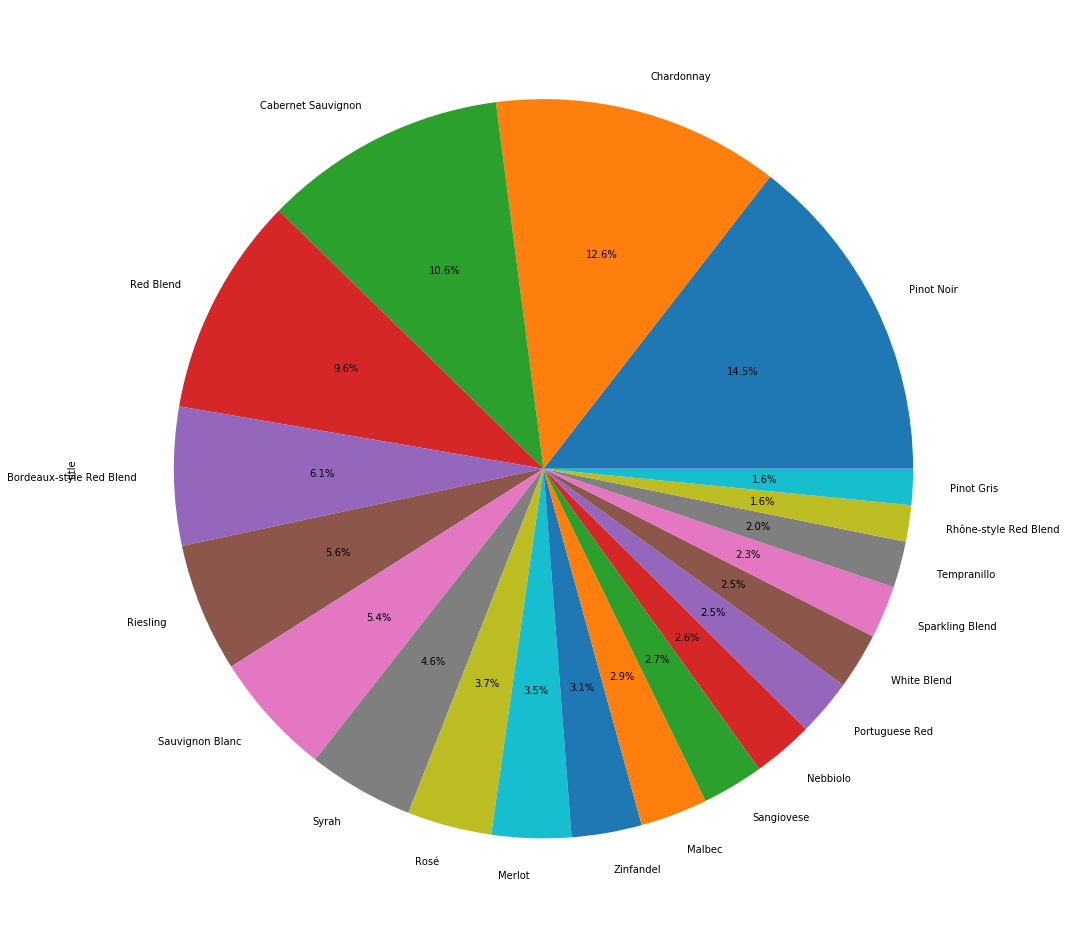

In [14]:
#ordered list of types and counts of Global wines including CA
gbl_varietal = clean_gbl_wines.groupby('variety')
gbl_type_count = gbl_varietal['title'].count()
print([gbl_type_count.sort_values(ascending=False).head(20)])
print()
print(f'There are {len(gbl_type_count.index)} varietal types of wine reviewed from All over the world')
print()
# Create pie plot of top 20 types by count of Global wines including CA
print('This is a breakdown of the top 20 by count of reviews')
t20_gbl_type_count = gbl_type_count.sort_values(ascending=False).head(20)
t20_gbl_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

[variety
Red Blend                   6675
Chardonnay                  5920
Pinot Noir                  5910
Riesling                    4712
Bordeaux-style Red Blend    4464
Cabernet Sauvignon          3716
Sauvignon Blanc             2979
Rosé                        2752
Malbec                      2393
Nebbiolo                    2298
Syrah                       2224
Portuguese Red              2196
Sangiovese                  2123
White Blend                 1807
Merlot                      1671
Tempranillo                 1650
Sparkling Blend             1480
Pinot Gris                  1196
Champagne Blend             1152
Grüner Veltliner            1120
Name: title, dtype: int64]

There are 672 varietal types of wine reviewed from every else besides Califonrina

This is a breakdown of the top 20 by count of reviews


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEC1B7C988>],
      dtype=object)

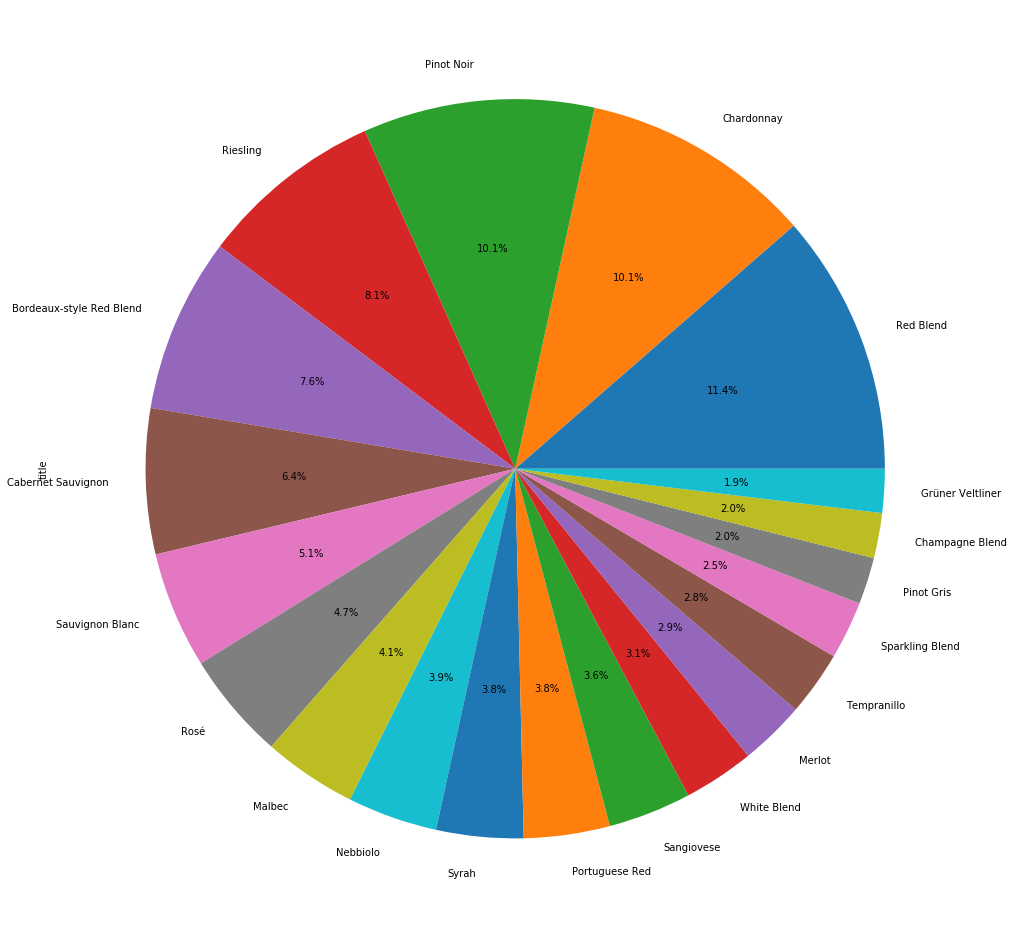

In [15]:
#ordered list of types and counts of Global wines without CA
noca_gbl_varietal = clean_gbl_wines_noca.groupby('variety')
noca_gbl_type_count = noca_gbl_varietal['title'].count()
print([noca_gbl_type_count.sort_values(ascending=False).head(20)])
print()
print(f'There are {len(noca_gbl_type_count.index)} varietal types of wine reviewed from every else besides Califonrina')
print()
# Create pie plot of top 20 types by count of Global wines without CA
print('This is a breakdown of the top 20 by count of reviews')
t20_noca_gbl_type_count = noca_gbl_type_count.sort_values(ascending=False).head(20)
t20_noca_gbl_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

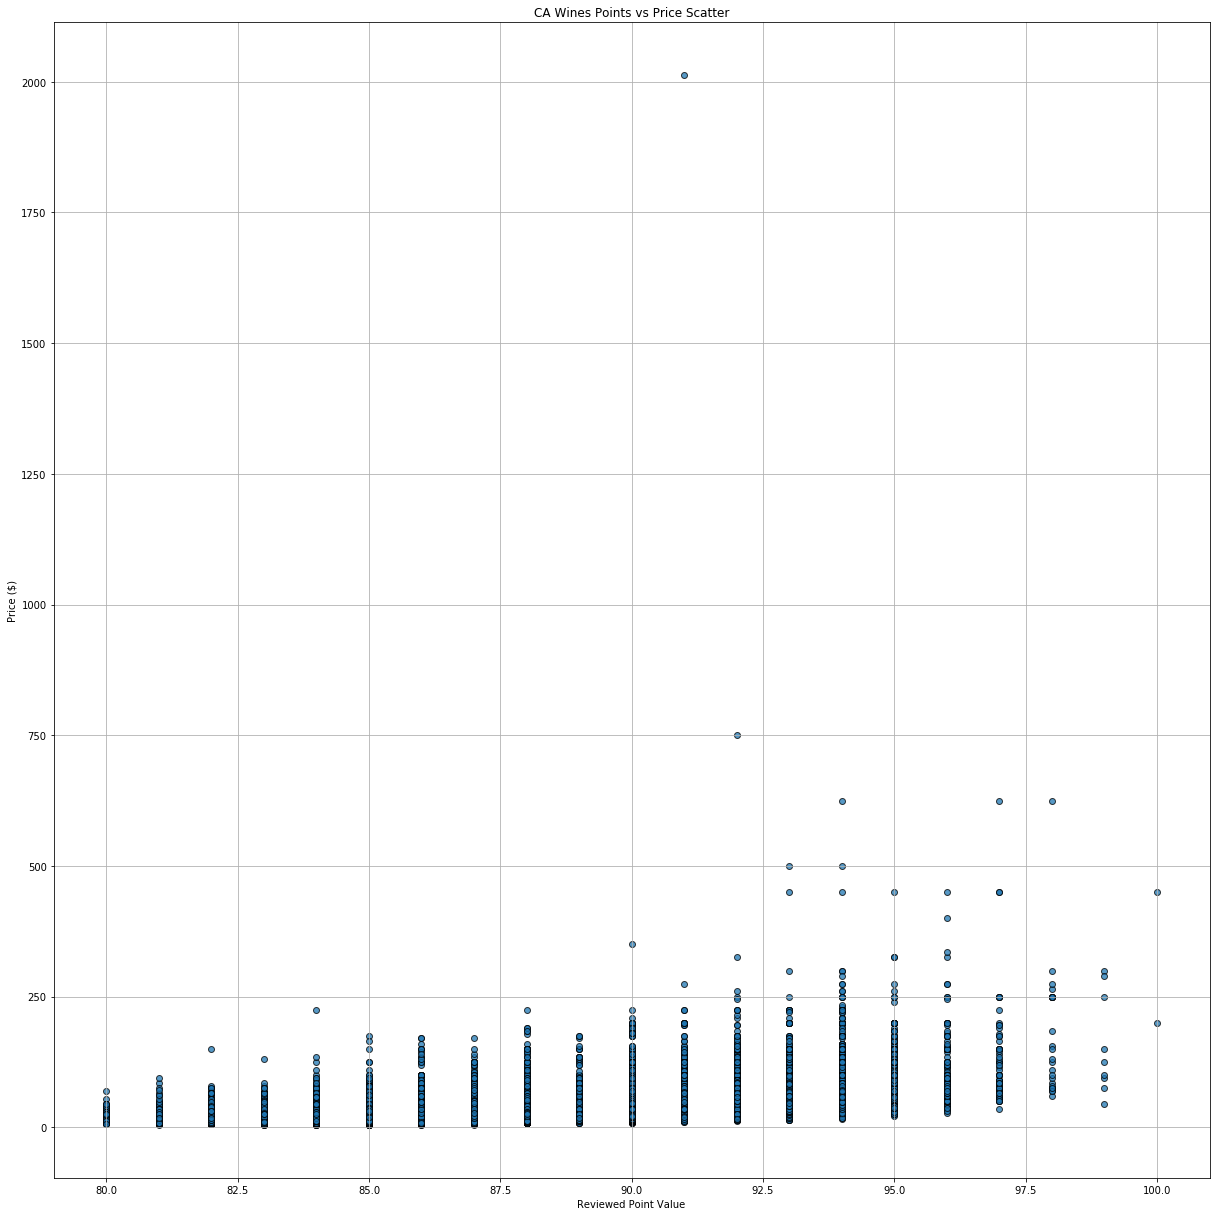

In [16]:
# points vs price
plt.figure(figsize=(17, 17))
plt.scatter(clean_ca_wines['points'], clean_ca_wines['price'], alpha=.75, edgecolors="k")
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title(f"CA Wines Points vs Price Scatter")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
# tight_layout. This module provides routines to adjust subplot params so that subplots are nicely fit in the figure. https://matplotlib.org/api/tight_layout_api.html
plt.show()

The correlation coefficient between Review Points and Price is 0.44 for CA Wines


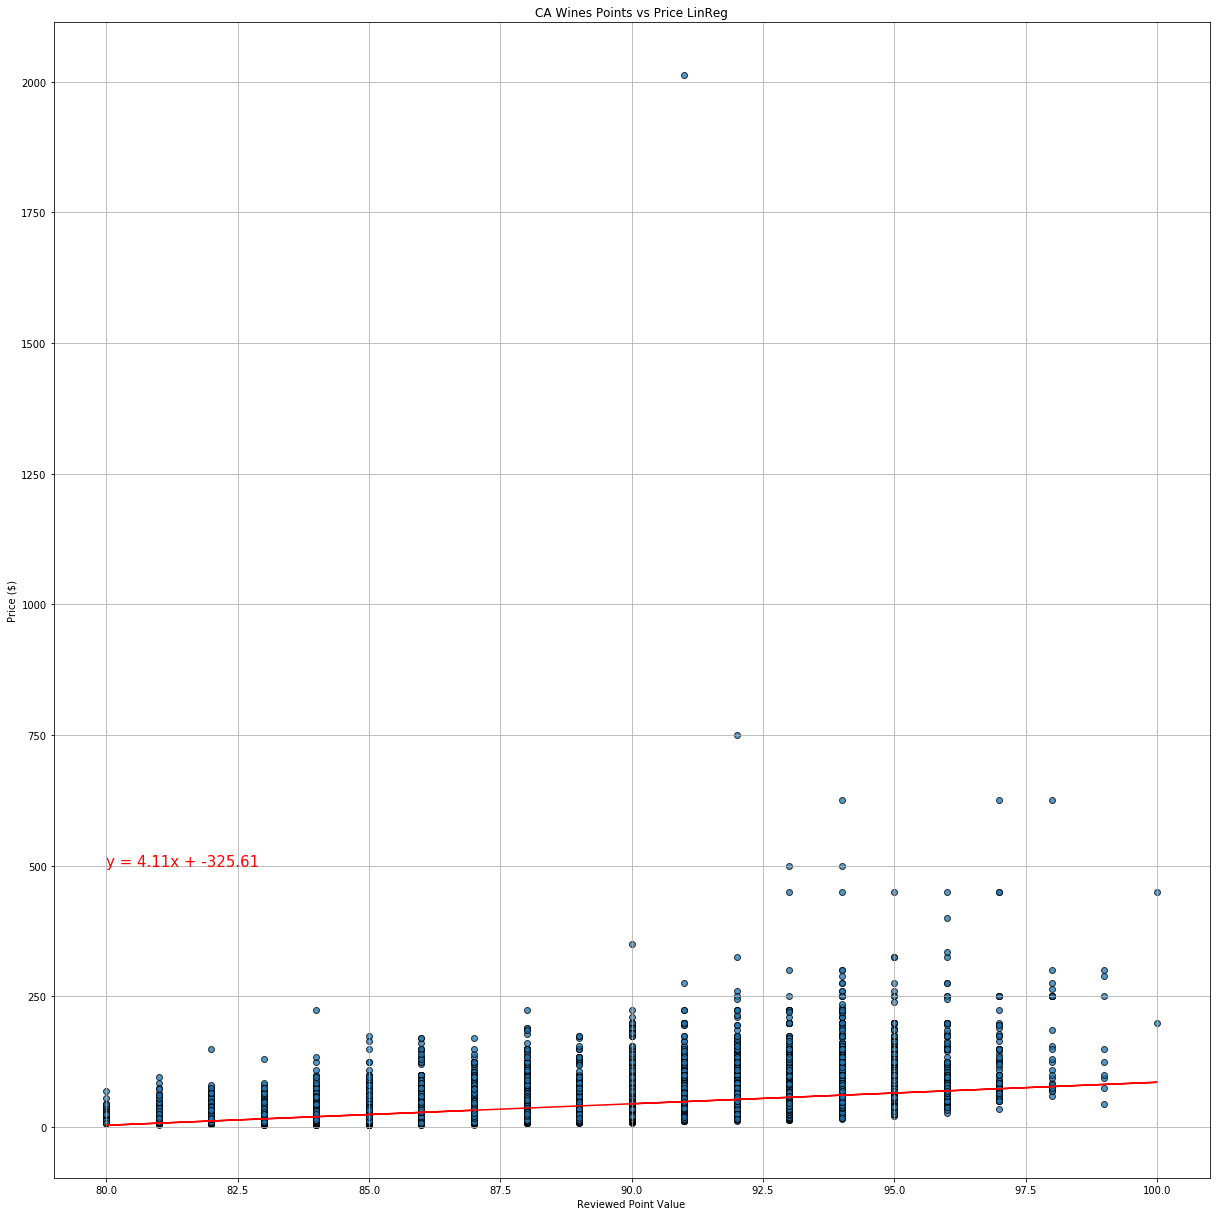

In [17]:
x_values = clean_ca_wines['points'].astype(float)
y_values = clean_ca_wines['price'].astype(float)

# Calculate Pearson r value
print(f"The correlation coefficient between Review Points and Price is {round(stats.pearsonr(x_values,y_values)[0],2)} for CA Wines")

# Calculate line for plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot and labels

plt.figure(figsize=(17, 17))
plt.title(f"CA Wines Points vs Price LinReg")
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k") 
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,500),fontsize=15,color="red")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
plt.show()

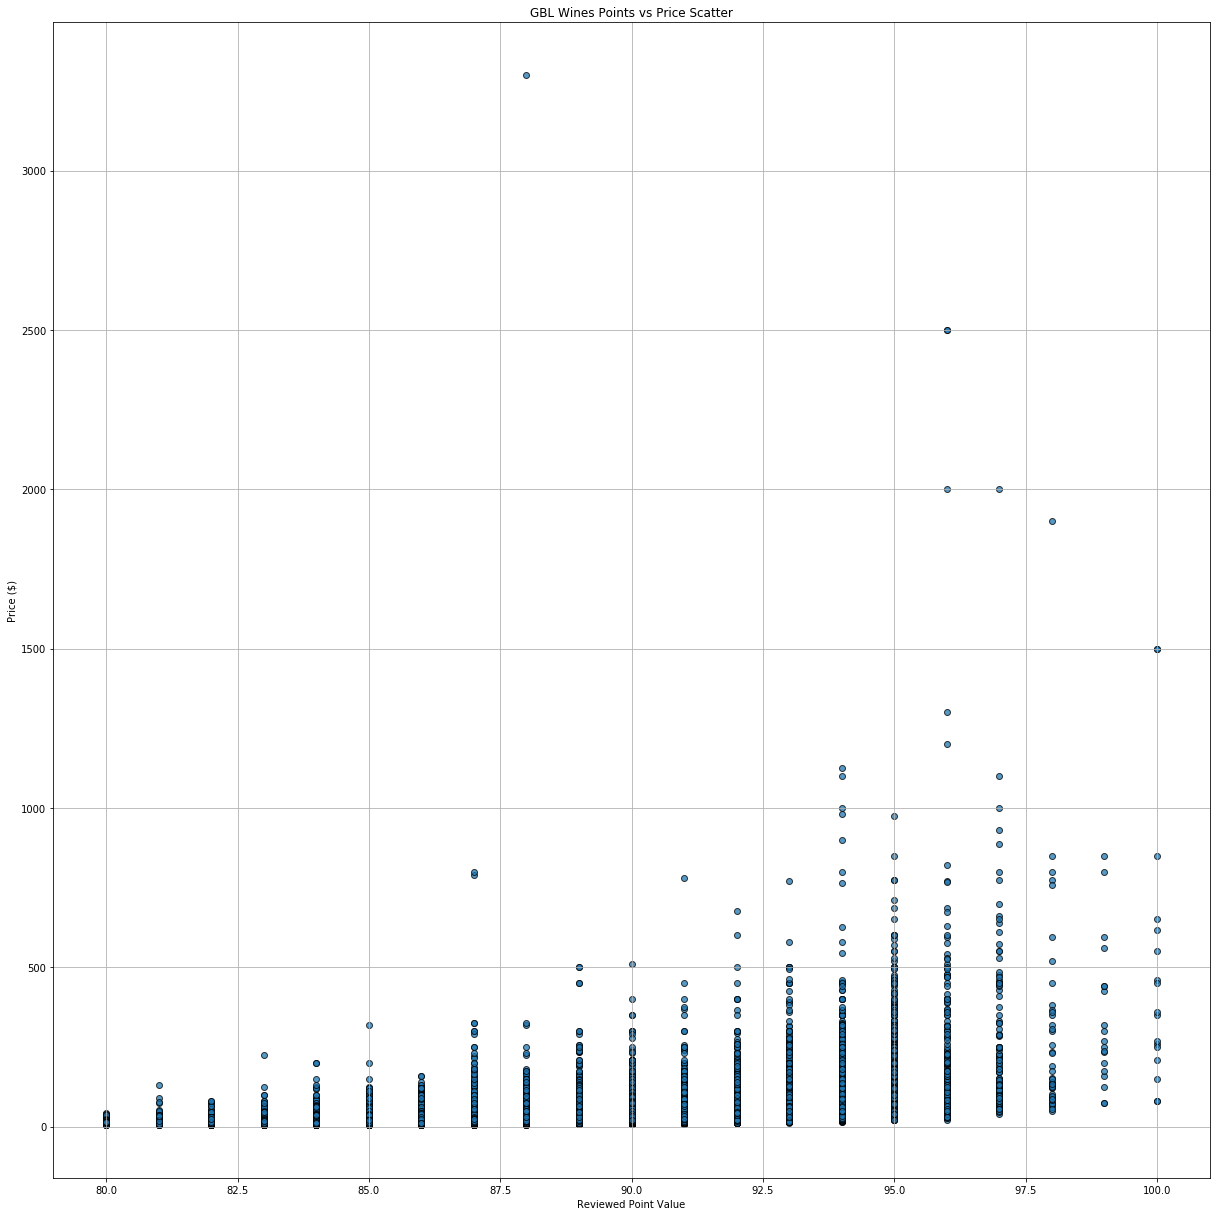

In [18]:
# GBL no CA points vs price
plt.figure(figsize=(17, 17))
plt.scatter(clean_gbl_wines_noca['points'], clean_gbl_wines_noca['price'], alpha=.75, edgecolors="k")
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title(f"GBL Wines Points vs Price Scatter")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
# tight_layout. This module provides routines to adjust subplot params so that subplots are nicely fit in the figure. https://matplotlib.org/api/tight_layout_api.html
plt.show()

The correlation coefficient between Review Points and Price is 0.42 for GBL Wines not from CA


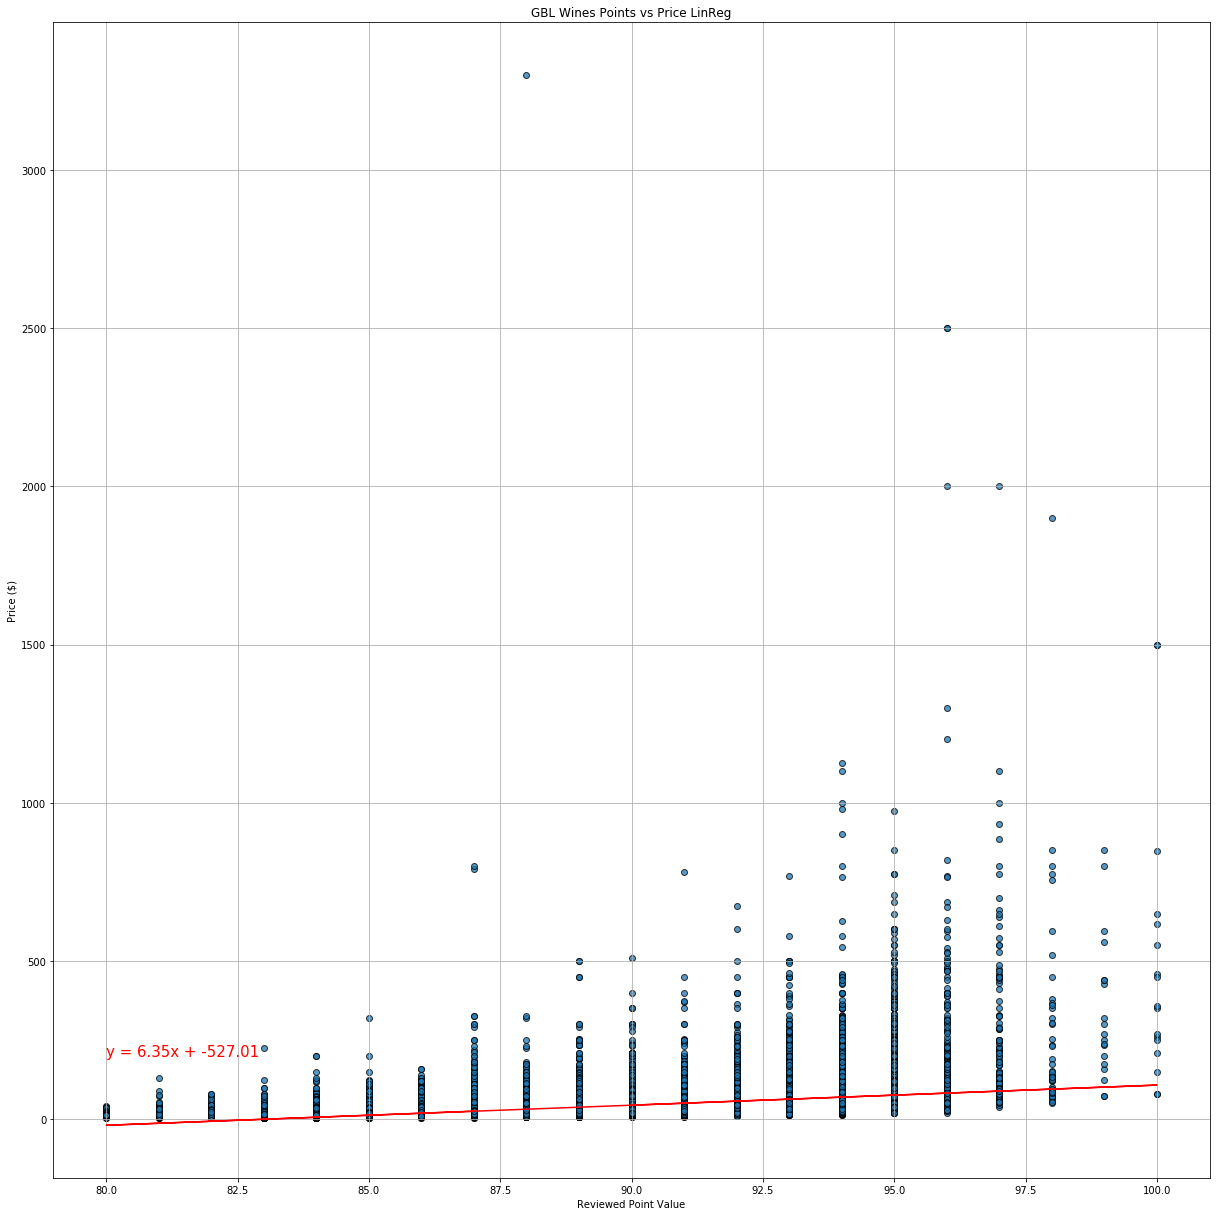

In [19]:
x_values = clean_gbl_wines_noca['points'].astype(float)
y_values = clean_gbl_wines_noca['price'].astype(float)

# Calculate Pearson r value
print(f"The correlation coefficient between Review Points and Price is {round(stats.pearsonr(x_values,y_values)[0],2)} for GBL Wines not from CA")

# Calculate line for plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot and labels

plt.figure(figsize=(17, 17))
plt.title(f"GBL Wines Points vs Price LinReg")
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k") 
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,200),fontsize=15,color="red")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [20]:
good_value_wines = clean_gbl_wines.loc[(clean_gbl_wines['price'] <= 20) & (clean_gbl_wines['points'] >= 94)]
good_value_wines

,country,points,price,province,title,variety,winery,new_wine_metric
5011,US,95,20.0,Washington,Dunham 2010 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham,1.250000
6267,US,94,18.0,Washington,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,Stottle,1.200000
15196,France,95,20.0,Southwest France,Alain Brumont 2010 Château Bouscassé Red (Madi...,Red Blend,Alain Brumont,1.250000
17294,US,94,20.0,Washington,Brian Carter Cellars 2009 Opulento Dessert Win...,Port,Brian Carter Cellars,1.333333
17983,France,94,20.0,Provence,Château Vignelaure 2016 Rosé (Coteaux d'Aix-en...,Rosé,Château Vignelaure,1.333333
19136,Spain,94,14.0,Andalucia,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Osborne,0.933333
20364,France,94,20.0,Alsace,Domaine Marcel Deiss 2011 White (Alsace),White Blend,Domaine Marcel Deiss,1.333333
23974,Portugal,94,13.0,Douro,Quinta dos Murças 2011 Assobio Red (Douro),Portuguese Red,Quinta dos Murças,0.866667
26432,Italy,94,20.0,Sicily & Sardinia,Le Casematte 2014 Peloro Red (Terre Siciliane),Red Blend,Le Casematte,1.333333
28575,US,94,20.0,California,Alma Rosa 2006 Chardonnay (Santa Barbara County),Chardonnay,Alma Rosa,1.333333


In [21]:
good_value_wines_prov = good_value_wines.groupby('province')
good_value_wines_prov['winery'].count()

province
Alentejano            1
Alsace                1
Andalucia             1
Beaujolais            1
California            4
Douro                 1
Kamptal               1
Kremstal              1
Oregon                2
Provence              1
Sicily & Sardinia     1
South Australia       1
Southwest France      4
Veneto                1
Washington           13
Name: winery, dtype: int64

In [22]:
# top 10 province by avg price
# See percentage of review by province/state for top 20
### Using cwd_prov = CWD.groupby('province') from above

cwd_prov_mean = cwd_prov['price'].mean().round(2)

print([cwd_prov_mean])
print()
print('The top 10 most expensive to least expensive provinces/states reviewed were:')
print([cwd_prov_mean.sort_values(ascending=False).head(10)])
print()
print(f'There were {len(cwd_prov_mean.index)} provinces/states reviewed.')

[province
Achaia                       23.00
Aconcagua Costa              23.07
Aconcagua Valley             40.30
Aegean                       33.41
Agioritikos                  24.00
                             ...  
Zenata                       16.84
Österreichischer Perlwein    16.75
Österreichischer Sekt        27.98
Štajerska                    17.18
Župa                         27.75
Name: price, Length: 422, dtype: float64]

The top 10 most expensive to least expensive provinces/states reviewed were:
[province
Colares              262.50
Vânju Mare           166.00
Switzerland          160.00
Madeira              115.18
Moscatel do Douro    103.20
Puente Alto           84.50
Buin                  83.62
Rheingau              79.85
Champagne             79.46
Santa Cruz            77.50
Name: price, dtype: float64]

There were 422 provinces/states reviewed.


In [23]:
# top 20 most reviewed wineries by avg point - count of reviews and then avg reviews
winery_groups = clean_gbl_wines.groupby('winery')

print(f'The number of unique wineries reviewed is {len(winery_groups)}')
print()
winery_groups_count = winery_groups['points'].count()
print('The most frequently reviewed wineries are:')
print([winery_groups_count.sort_values(ascending=False).head(20)])
print()
print()
winery_groups_avg_points = winery_groups['points'].mean()
print([winery_groups_avg_points.sort_values(ascending=False).head(20)])
print()
print()
winery_groups_avg_price = winery_groups['price'].mean().round(2)
print([winery_groups_avg_price.sort_values(ascending=False).head(20)])
print()
print()
winery_merged_data = pd.merge(winery_groups_count,winery_groups_avg_points, on="winery", how="inner")
winery_merged_data = pd.merge(winery_merged_data,winery_groups_avg_price, on="winery", how="inner")
winery_merged_data.columns = ['Review Count','Avg Review','Avg Price']
print([winery_merged_data.sort_values(by=['Review Count'],ascending=False).head(50)])

The number of unique wineries reviewed is 15843

The most frequently reviewed wineries are:
[winery
Testarossa               217
Williams Selyem          211
Wines & Winemakers       209
DFJ Vinhos               209
Chateau Ste. Michelle    193
Louis Latour             173
Concha y Toro            162
Columbia Crest           158
Kendall-Jackson          130
Siduri                   126
Gary Farrell             125
Georges Duboeuf          120
Lynmar                   118
Montes                   117
Trapiche                 112
Robert Mondavi           112
Undurraga                111
Santa Ema                110
Fess Parker              108
V. Sattui                107
Name: points, dtype: int64]


[winery
Araujo                     98.000000
Clos de Tart               98.000000
Château Cheval Blanc       97.000000
Château Angélus            97.000000
Gandona                    97.000000
Château d'Yquem            97.000000
Ovid                       97.000000
J.L. Chave             

In [24]:
cal_wine_count = clean_ca_wines['price'].count()
noncal_wine_count = clean_gbl_wines_noca['price'].count()


# look at IQR for price
cal_price_iqr = clean_ca_wines['price']
cal_quartiles = round(cal_price_iqr.quantile([.25,.5,.75]),2)
cal_lowerq = round(cal_quartiles[0.25],2)
cal_upperq = round(cal_quartiles[0.75],2)
cal_iqr = round(cal_upperq-cal_lowerq,2)

print('California IQR price Data:')
print(f"The lower quartile of price for Californian Wines is : {cal_lowerq}")
print(f"The upper quartile of price for Californian Wines is: {cal_upperq}")
print(f"The interquartile range of pricee for Californian Wines is: {cal_iqr}")
print(f"The the median of price for Californian Wines is: {cal_quartiles[0.5]} ")

cal_lower_bound = round(cal_lowerq - (1.5*cal_iqr),2)
cal_upper_bound = round(cal_upperq + (1.5*cal_iqr),2)

# print(f"Values below {cal_lower_bound} could be outliers.")

print(f"Values above {cal_upper_bound} could be outliers.")
#cal_lwr_otlr_count = clean_ca_wines.loc[clean_ca_wines['price'] <= {cal_lower_bound}]
cal_upr_otlr_count = clean_ca_wines['price'][clean_ca_wines['price'] >= 87].count()
cal_otlr_pct = (cal_upr_otlr_count/cal_wine_count)*100
print(f'Of the {cal_wine_count} Californian wines, There are {cal_upr_otlr_count} above the upper bounds or {cal_otlr_pct.round(2)}%')

noncal_price_iqr = clean_gbl_wines_noca['price']
noncal_quartiles = round(noncal_price_iqr.quantile([.25,.5,.75]),2)
noncal_lowerq = round(noncal_quartiles[0.25],2)
noncal_upperq = round(noncal_quartiles[0.75],2)
noncal_iqr = round(noncal_upperq-noncal_lowerq,2)

print()
print('Non Californian IQR price Data:')
print(f"The lower quartile of price for non Californian Wines is : {noncal_lowerq}")
print(f"The upper quartile of price for non Californian Wines is: {noncal_upperq}")
print(f"The interquartile range of pricee for non Californian Wines is: {noncal_iqr}")
print(f"The the median of price for non Californian Wines is: {noncal_quartiles[0.5]} ")

noncal_lower_bound = round(noncal_lowerq - (1.5*cal_iqr),2)
noncal_upper_bound = round(noncal_upperq + (1.5*cal_iqr),2)

# print(f"Values below {noncal_lower_bound} could be outliers.")

print(f"Values above {noncal_upper_bound} could be outliers.")

noncal_upr_otlr_count = clean_gbl_wines_noca['price'][clean_gbl_wines_noca['price'] >= 79].count()
noncal_otlr_pct = (noncal_upr_otlr_count/noncal_wine_count)*100
print(f'Of the {noncal_wine_count} Californian wines, There are {noncal_upr_otlr_count} NonCalifornian wines above the upper bounds or {noncal_otlr_pct.round(2)}%')

California IQR price Data:
The lower quartile of price for Californian Wines is : 22.0
The upper quartile of price for Californian Wines is: 48.0
The interquartile range of pricee for Californian Wines is: 26.0
The the median of price for Californian Wines is: 33.0 
Values above 87.0 could be outliers.
Of the 36104 Californian wines, There are 1592 above the upper bounds or 4.41%

Non Californian IQR price Data:
The lower quartile of price for non Californian Wines is : 16.0
The upper quartile of price for non Californian Wines is: 40.0
The interquartile range of pricee for non Californian Wines is: 24.0
The the median of price for non Californian Wines is: 24.0 
Values above 79.0 could be outliers.
Of the 84811 Californian wines, There are 5121 NonCalifornian wines above the upper bounds or 6.04%


C:\Users\Armstrong\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Armstrong\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


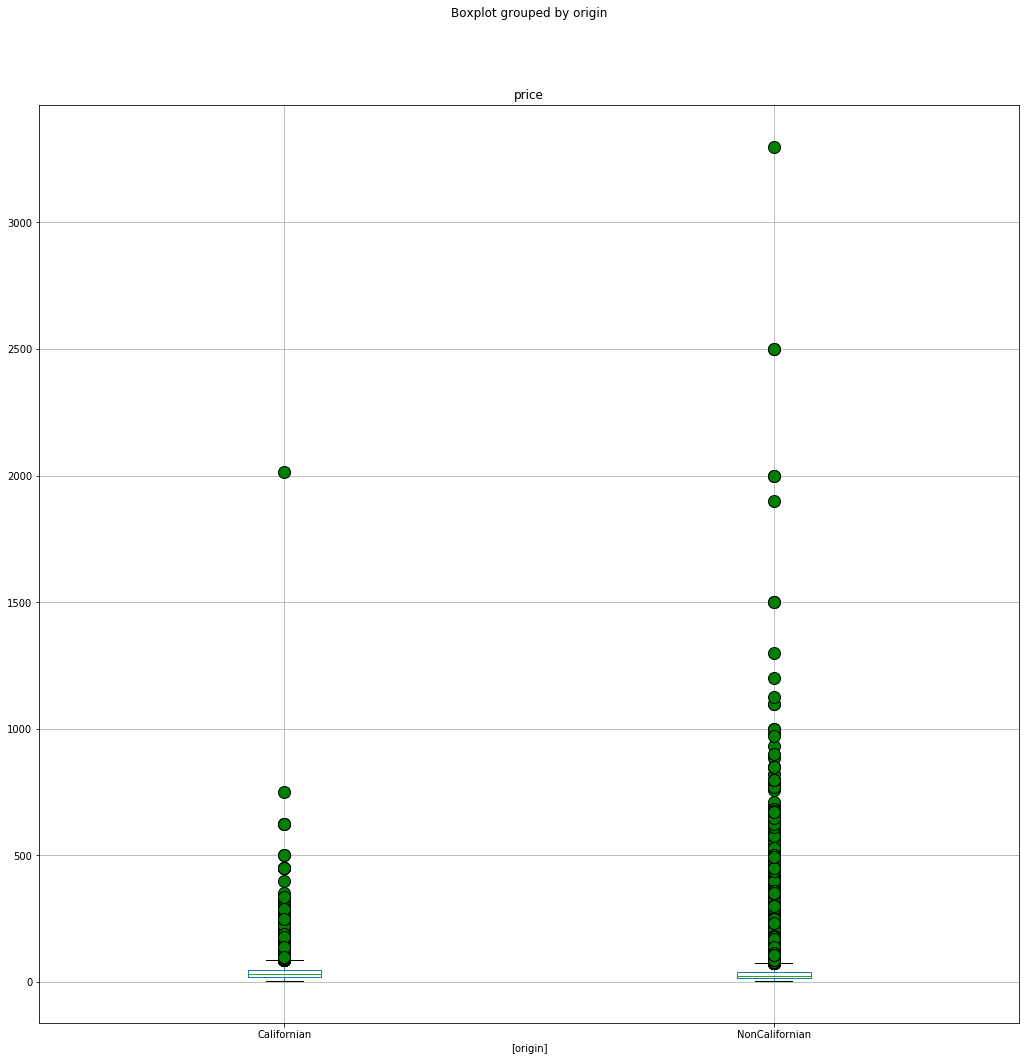

In [25]:
#Eliminate outliers

bw_plt_data = []
bw_plt_data = clean_gbl_wines[['price','province']]
bw_plt_data.loc[bw_plt_data['province'] == 'California', 'origin'] = 'Californian'
bw_plt_data.loc[bw_plt_data['province'] != 'California', 'origin'] = 'NonCalifornian'
bw_plt_data

flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')

bw_plt_data.boxplot(by="origin", flierprops=flierprops, figsize=(17,17))
#plt.set_title('Wine Origin Price')
#plt.set_ylabel('Price in USD')
plt.show()

In [26]:
# Run a ttest on points

# Isolate the data to compare
cal_reviews = clean_gbl_wines.loc[clean_gbl_wines['province'] == 'California']['points']
noncal_reviews = clean_gbl_wines.loc[clean_gbl_wines['province'] != 'California']['points']

# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(cal_reviews, noncal_reviews, equal_var=False)

Ttest_indResult(statistic=14.886391250192396, pvalue=4.92451324079903e-50)

In [27]:
# Run a ttest on price

# Isolate the data to compare
cal_price_reviews = clean_gbl_wines.loc[clean_gbl_wines['province'] == 'California']['price']
noncal_price_reviews = clean_gbl_wines.loc[clean_gbl_wines['province'] != 'California']['price']

# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(cal_price_reviews, noncal_price_reviews, equal_var=False)

Ttest_indResult(statistic=23.658792372061104, pvalue=2.1251167920712254e-123)

In [28]:
# ANOVA Test

# Perform the ANOVA
stats.f_oneway(cal_reviews, noncal_reviews)

F_onewayResult(statistic=240.17287566654184, pvalue=4.0660140049767017e-54)

In [29]:
# CHI Squared Analysis

chi_cal_nwm = CWD.loc[CWD['province'] == 'California']['points'].mean()
chi_noncal_nwm = CWD.loc[CWD['province'] != 'California']['points'].mean()

observed = pd.Series([[chi_cal_nwm][0],[chi_noncal_nwm][0]], index=["California", "NonCalifornia"])

wine_chi = pd.DataFrame([observed]).T

# Create a data frame
wine_chi[1] = CWD['points'].mean()

# Rename columns
wine_chi.columns = ["observed", "expected"]

# View the data frame
wine_chi

,observed,expected
California,88.629515,88.421726
NonCalifornia,88.333270,88.421726


In [30]:
# The degree of freedom is either California or Non California so DoF (2-1 = 1)
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.

critical_value = stats.chi2.ppf(q = 0.95, df = 1)

# The critical value
print(critical_value)

# Run the chi square test with stats.chisquare()
stats.chisquare(wine_chi['observed'], wine_chi['expected'])

3.841458820694124


Power_divergenceResult(statistic=0.0005767874479447894, pvalue=0.9808395275207306)